In [1]:
import tensorflow_datasets as tfds

# Download the subword encoded pretokenized dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

# Get the tokenizer
tokenizer = info.features['text'].encoder

2024-01-28 20:17:39.370423: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-28 20:17:39.370582: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-28 20:17:39.388997: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-28 20:17:39.389127: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-28 20:17:39.389220: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

In [2]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

# Get the train and test splits
train_data, test_data = dataset['train'], dataset['test'], 

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)


In [7]:
import tensorflow as tf
import numpy as np

# Hyperparameter
batch_size =1
timesteps = 20
features = 20
filters = 128
kernel_size = 5

print(f'batch_size: {batch_size}')
print(f'timesteps (sequence length): {timesteps}')
print(f'features (embedding size): {features}')
print(f'filters: {filters}')
print(f'kernel_size: {kernel_size}')

# Define array input with random values
random_input = np.random.rand(batch_size, timesteps, features)
print(f'shape of input array: {random_input.shape}')

# Pass array to convolution layer and inspect output shape
conv1d = tf.keras.layers.Conv1D(filters= filters, kernel_size=kernel_size, activation='relu')
result= conv1d(random_input)
print(f'shape of conv1d output: {result.shape}')

# Pass array to max pooling layer and inspect output shape
gmp = tf.keras.layers.GlobalMaxPooling1D()
result = gmp(result)
print(f'shape of global max pooling output: {result.shape}')

batch_size: 1
timesteps (sequence length): 20
features (embedding size): 20
filters: 128
kernel_size: 5
shape of input array: (1, 20, 20)
shape of conv1d output: (1, 16, 128)
shape of global max pooling output: (1, 128)


In [11]:
#Hyperparameters
embedding_dim =64
filters=128
kernel_size=5
dense_dim=64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Conv1D(filters, kernel_size=kernel_size,activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          523840    
                                                                 
 conv1d_4 (Conv1D)           (None, None, 128)         41088     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
__________________________________________________

In [12]:
# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
NUM_EPOCHS = 10

# Train the model
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10


2024-01-28 20:47:48.890944: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


98/98 [==============================] - 21s 208ms/step - loss: 0.6171 - accuracy: 0.6543 - val_loss: 0.4141 - val_accuracy: 0.8144
Epoch 2/10
98/98 [==============================] - 9s 93ms/step - loss: 0.2870 - accuracy: 0.8807 - val_loss: 0.2633 - val_accuracy: 0.8898
Epoch 3/10
98/98 [==============================] - 8s 81ms/step - loss: 0.1464 - accuracy: 0.9489 - val_loss: 0.2695 - val_accuracy: 0.8915
Epoch 4/10
98/98 [==============================] - 8s 77ms/step - loss: 0.0609 - accuracy: 0.9865 - val_loss: 0.2880 - val_accuracy: 0.8942
Epoch 5/10
98/98 [==============================] - 6s 63ms/step - loss: 0.0187 - accuracy: 0.9983 - val_loss: 0.3228 - val_accuracy: 0.8935
Epoch 6/10
98/98 [==============================] - 6s 63ms/step - loss: 0.0066 - accuracy: 0.9998 - val_loss: 0.3498 - val_accuracy: 0.8936
Epoch 7/10
98/98 [==============================] - 6s 63ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.3700 - val_accuracy: 0.8938
Epoch 8/10
98/98 [====

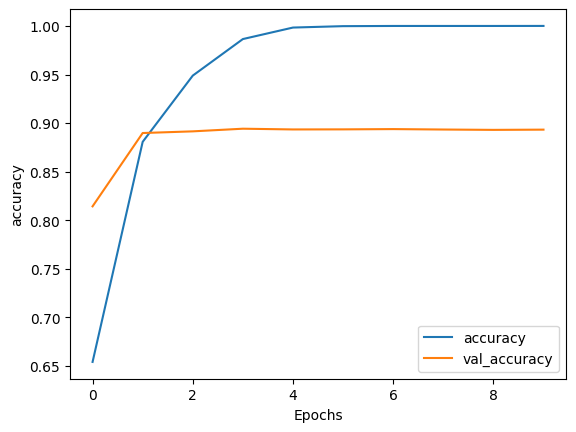

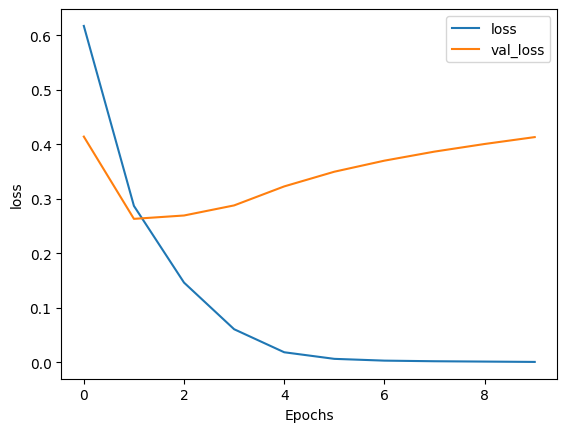

In [14]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")